In [33]:
import pandas as pd

# Load the dataset from CSV file
dataset_original = pd.read_csv('C:\prepro_path_loss_data1.csv')
dataset_original.describe(include='all') 
summary_stats = dataset_original.describe(include='all') 
styled_summary = summary_stats.style.background_gradient(cmap='viridis', axis=None)
styled_summary

,Frequency,Distance,TransmitterHeight,ReceiverHeight,AntennaGain,Environment,ObstacleDistance,PathCharacteristics,WeatherConditions,ShadowingEffects,FrequencyBandwidth,PathLoss,CEnvironment,CPathCharacteristics,CWeatherConditions
count,2014.000000,2014.000000,2014.000000,2014.000000,2014.000000,2014,2014.000000,2014,2014,2014.000000,2014.000000,2014.000000,2014.000000,2014.000000,2014.000000
unique,nan,nan,nan,nan,nan,3,nan,2,3,nan,nan,nan,nan,nan,nan
top,nan,nan,nan,nan,nan,urban,nan,NLOS,foggy,nan,nan,nan,nan,nan,nan
freq,nan,nan,nan,nan,nan,721,nan,1021,690,nan,nan,nan,nan,nan,nan
mean,3512866558.011917,258.438191,25.308291,5.521255,12.426361,nan,49.877295,nan,nan,-0.073439,55871490.053694,324.722322,2.020854,1.506951,2.000993
std,1457143553.911211,139.198010,14.201975,2.599368,4.356894,nan,29.338041,nan,nan,3.016205,25728924.519110,26.489923,0.833693,0.500076,0.811002
min,1001858949.000000,10.248070,1.017154,1.007534,5.028631,nan,0.022352,nan,nan,-11.614626,10032911.390000,240.349197,1.000000,1.000000,1.000000
25%,2209173167.750000,139.972619,12.953020,3.187430,8.664862,nan,24.438209,nan,nan,-2.114115,34484145.287500,307.071871,1.000000,1.000000,1.000000
50%,3530548342.000000,259.615760,25.009143,5.598039,12.398110,nan,49.154967,nan,nan,-0.071986,55871928.630000,324.263910,2.000000,2.000000,2.000000
75%,4781537053.750000,374.405105,37.388444,7.797800,16.166588,nan,74.719015,nan,nan,1.895679,78430418.707500,344.163449,3.000000,2.000000,3.000000


In [34]:
# Preprocess the data if needed (e.g., normalization, standardization)

preproceded_dataset= dataset_original.drop(columns=['Environment', 'PathCharacteristics','WeatherConditions'])  # String data label, have been coded to numeric target variable  
summary_stats = preproceded_dataset.describe(include='all') 
styled_summary = summary_stats.style.background_gradient(cmap='viridis', axis=None)
styled_summary


,Frequency,Distance,TransmitterHeight,ReceiverHeight,AntennaGain,ObstacleDistance,ShadowingEffects,FrequencyBandwidth,PathLoss,CEnvironment,CPathCharacteristics,CWeatherConditions
count,2014.000000,2014.000000,2014.000000,2014.000000,2014.000000,2014.000000,2014.000000,2014.000000,2014.000000,2014.000000,2014.000000,2014.000000
mean,3512866558.011917,258.438191,25.308291,5.521255,12.426361,49.877295,-0.073439,55871490.053694,324.722322,2.020854,1.506951,2.000993
std,1457143553.911211,139.198010,14.201975,2.599368,4.356894,29.338041,3.016205,25728924.519110,26.489923,0.833693,0.500076,0.811002
min,1001858949.000000,10.248070,1.017154,1.007534,5.028631,0.022352,-11.614626,10032911.390000,240.349197,1.000000,1.000000,1.000000
25%,2209173167.750000,139.972619,12.953020,3.187430,8.664862,24.438209,-2.114115,34484145.287500,307.071871,1.000000,1.000000,1.000000
50%,3530548342.000000,259.615760,25.009143,5.598039,12.398110,49.154967,-0.071986,55871928.630000,324.263910,2.000000,2.000000,2.000000
75%,4781537053.750000,374.405105,37.388444,7.797800,16.166588,74.719015,1.895679,78430418.707500,344.163449,3.000000,2.000000,3.000000
max,5999366700.000000,499.962911,49.989720,9.999409,19.979289,99.953363,9.067355,99975761.070000,390.412876,3.000000,2.000000,3.000000


In [35]:
# Separate features (X) and target variable (y)
dataset = preproceded_dataset
dataset.drop(columns=['PathLoss'])     # Assuming 'path_loss' is the name of the target variable
X = dataset.drop(columns=['PathLoss'])
y = dataset['PathLoss']


In [36]:
# Preprocess the data if needed (e.g., normalization, standardization)

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Assuming X and y represent your full dataset
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Now we have X_train, X_val, y_train, and y_val available for training and validation


In [37]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


# Define the deep neural network architecture
def create_model(input_shape, hidden_layers, neurons_per_layer, dropout_rate):
    model = Sequential()
    model.add(Dense(neurons_per_layer, input_dim=input_shape, activation='relu'))
    model.add(Dropout(dropout_rate))
    
    for _ in range(hidden_layers - 1):
        model.add(Dense(neurons_per_layer, activation='relu'))
        model.add(Dropout(dropout_rate))
    
    model.add(Dense(1))  # Output layer
    
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])
    return model

# Instantiate the model with the best parameters found during optimization
best_model = create_model(input_shape=X_train.shape[1], hidden_layers=3, neurons_per_layer=128, dropout_rate=0.3)

# Train the model on the training data
best_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model on the testing data
test_loss = best_model.evaluate(X_test, y_test, verbose=0)
print("Test Loss:", test_loss)



Epoch 1/50
51/51 [==============================] - 10s 85ms/step - loss: 28728973965918208.0000 - mse: 28728973965918208.0000 - val_loss: 68141786857472.0000 - val_mse: 68141786857472.0000
Epoch 2/50
51/51 [==============================] - 1s 13ms/step - loss: 4835135132270592.0000 - mse: 4835135132270592.0000 - val_loss: 11584137068544.0000 - val_mse: 11584137068544.0000
Epoch 3/50
51/51 [==============================] - 0s 9ms/step - loss: 2422877219454976.0000 - mse: 2422877219454976.0000 - val_loss: 22709383725056.0000 - val_mse: 22709383725056.0000
Epoch 4/50
51/51 [==============================] - 0s 8ms/step - loss: 1825246613078016.0000 - mse: 1825246613078016.0000 - val_loss: 2033378787328.0000 - val_mse: 2033378787328.0000
Epoch 5/50
51/51 [==============================] - 1s 10ms/step - loss: 1167698260131840.0000 - mse: 1167698260131840.0000 - val_loss: 1407024365568.0000 - val_mse: 1407024365568.0000
Epoch 6/50
51/51 [==============================] - 0s 7ms/step - lo

51/51 [==============================] - 0s 6ms/step - loss: 4283384725504.0000 - mse: 4283384725504.0000 - val_loss: 1146334464.0000 - val_mse: 1146334464.0000
Epoch 48/50
51/51 [==============================] - 0s 6ms/step - loss: 4009197305856.0000 - mse: 4009197305856.0000 - val_loss: 2264418304.0000 - val_mse: 2264418304.0000
Epoch 49/50
51/51 [==============================] - 0s 7ms/step - loss: 2638008287232.0000 - mse: 2638008287232.0000 - val_loss: 2082523264.0000 - val_mse: 2082523264.0000
Epoch 50/50
51/51 [==============================] - 0s 6ms/step - loss: 2252636160000.0000 - mse: 2252636160000.0000 - val_loss: 20144728064.0000 - val_mse: 20144728064.0000
Test Loss: [20144728064.0, 20144728064.0]


In [38]:
# Make predictions using the trained model
FFDNN_predictions = best_model.predict(X_test)

# Optionally, you can save the predictions to a CSV file
FFDNN_predictions_df = pd.DataFrame(FFDNN_predictions, columns=['FFDNN_predicted_path_loss'])
FFDNN_predictions_df.to_csv('FFDNN_predictions.csv', index=False)


13/13 [==============================] - 0s 3ms/step


Epoch 1/50
51/51 [==============================] - 0s 9ms/step - loss: 6448976756736.0000 - mse: 6448976756736.0000 - val_loss: 85954650112.0000 - val_mse: 85954650112.0000
Epoch 2/50
51/51 [==============================] - 0s 8ms/step - loss: 1502236508160.0000 - mse: 1502236508160.0000 - val_loss: 23397940.0000 - val_mse: 23397940.0000
Epoch 3/50
51/51 [==============================] - 0s 8ms/step - loss: 2809048858624.0000 - mse: 2809048858624.0000 - val_loss: 8851059712.0000 - val_mse: 8851059712.0000
Epoch 4/50
51/51 [==============================] - 0s 7ms/step - loss: 2623226511360.0000 - mse: 2623226511360.0000 - val_loss: 1822455680.0000 - val_mse: 1822455680.0000
Epoch 5/50
51/51 [==============================] - 0s 7ms/step - loss: 2192013000704.0000 - mse: 2192013000704.0000 - val_loss: 5363200000.0000 - val_mse: 5363200000.0000
Epoch 6/50
51/51 [==============================] - 0s 8ms/step - loss: 3243727388672.0000 - mse: 3243727388672.0000 - val_loss: 7913198592.00

Epoch 49/50
51/51 [==============================] - 0s 6ms/step - loss: 202832101376.0000 - mse: 202832101376.0000 - val_loss: 8108552192.0000 - val_mse: 8108552192.0000
Epoch 50/50
51/51 [==============================] - 0s 6ms/step - loss: 395642241024.0000 - mse: 395642241024.0000 - val_loss: 9913448448.0000 - val_mse: 9913448448.0000
Test Loss: [9913448448.0, 9913448448.0]
13/13 [==============================] - 0s 2ms/step
R2 Score: -14794689.428430755
RMSE: 99566.30577745965


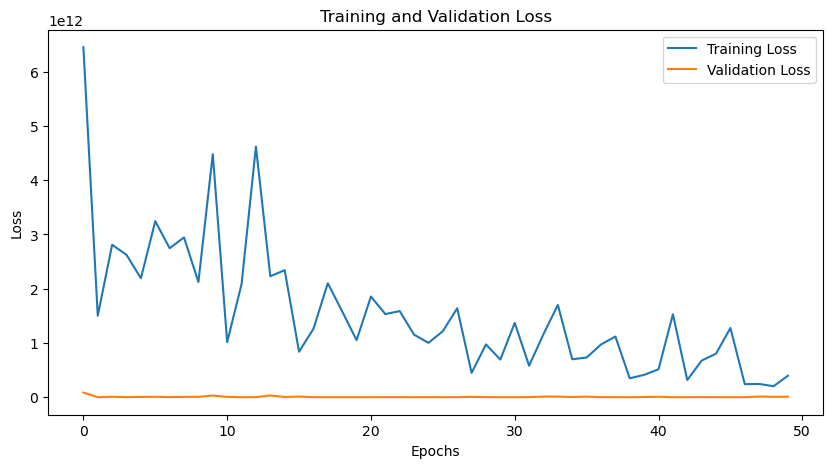

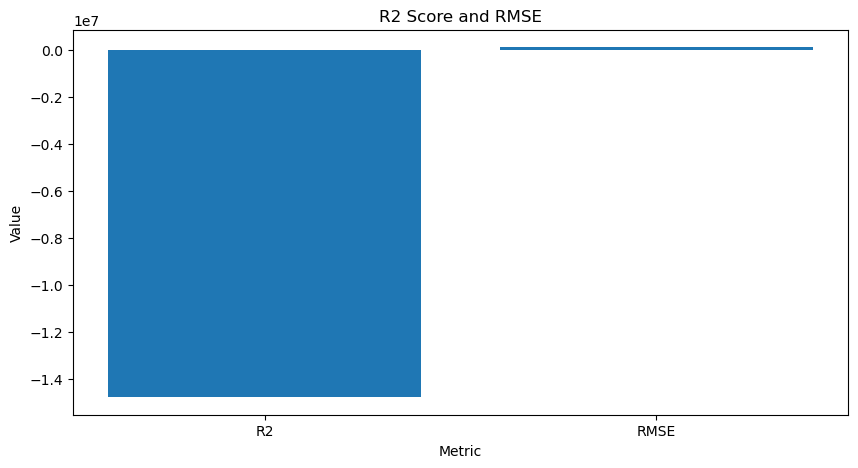

In [39]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error

# Train the model on the training data while storing the history
history = best_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model on the testing data
test_loss = best_model.evaluate(X_test, y_test, verbose=0)
print("Test Loss:", test_loss)

# Get predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate R2 and RMSE metrics
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("R2 Score:", r2)
print("RMSE:", rmse)

# Plotting the metrics and losses
# Plot training and validation losses
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot R2 and RMSE
plt.figure(figsize=(10, 5))
plt.bar(['R2', 'RMSE'], [r2, rmse])
plt.title('R2 Score and RMSE')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.show()


Epoch 1/50
51/51 [==============================] - 1s 11ms/step - loss: 344334106624.0000 - mse: 344334106624.0000 - val_loss: 7404663808.0000 - val_mse: 7404663808.0000
Epoch 2/50
51/51 [==============================] - 0s 6ms/step - loss: 167814938624.0000 - mse: 167814938624.0000 - val_loss: 1939698304.0000 - val_mse: 1939698304.0000
Epoch 3/50
51/51 [==============================] - 0s 7ms/step - loss: 216078467072.0000 - mse: 216078467072.0000 - val_loss: 579987200.0000 - val_mse: 579987200.0000
Epoch 4/50
51/51 [==============================] - 0s 7ms/step - loss: 310288973824.0000 - mse: 310288973824.0000 - val_loss: 996822400.0000 - val_mse: 996822400.0000
Epoch 5/50
51/51 [==============================] - 0s 7ms/step - loss: 189127966720.0000 - mse: 189127966720.0000 - val_loss: 616303296.0000 - val_mse: 616303296.0000
Epoch 6/50
51/51 [==============================] - 0s 6ms/step - loss: 364488851456.0000 - mse: 364488851456.0000 - val_loss: 14493054976.0000 - val_mse: 

51/51 [==============================] - 0s 6ms/step - loss: 99580485632.0000 - mse: 99580485632.0000 - val_loss: 166751408.0000 - val_mse: 166751408.0000
Epoch 50/50
51/51 [==============================] - 0s 6ms/step - loss: 66759557120.0000 - mse: 66759557120.0000 - val_loss: 956010304.0000 - val_mse: 956010304.0000
Test Loss: [956010304.0, 956010304.0, 28529.419921875, 30919.416015625]
13/13 [==============================] - 1s 6ms/step
R2 Score: -1426735.2262154813
RMSE: 30919.417029345077


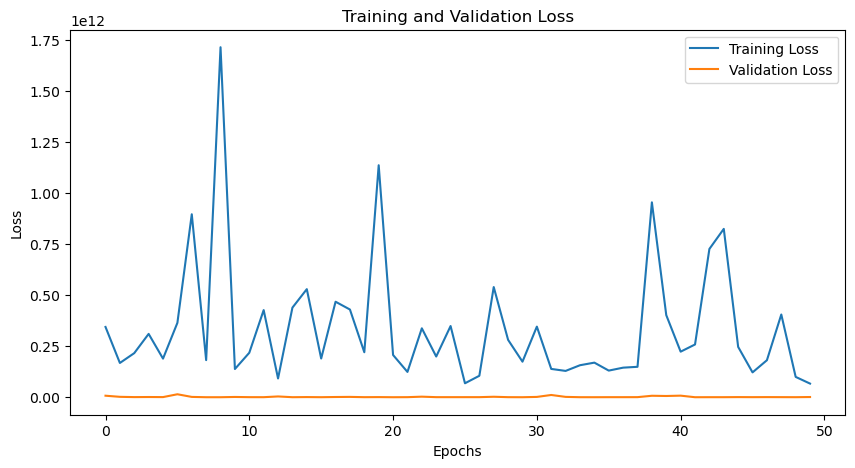

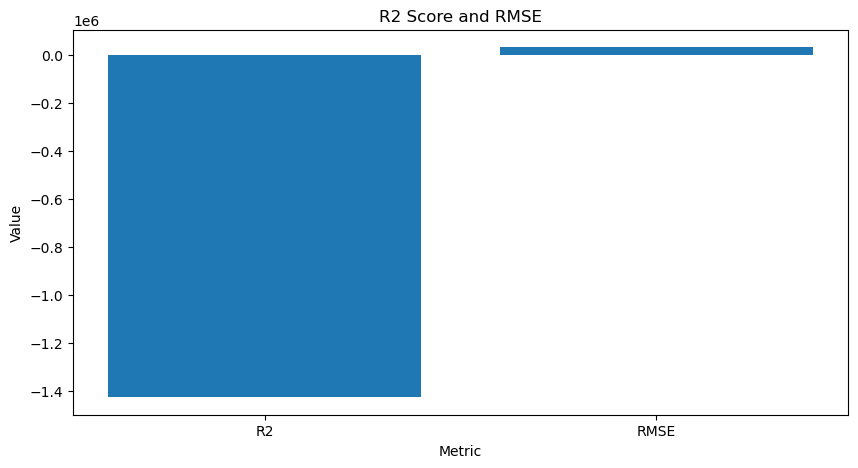

In [40]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error

# Train the model on the training data while storing the history
history = best_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Compile model
best_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse', 'mae', tf.keras.metrics.RootMeanSquaredError()])

# Evaluate the model on the testing data
test_loss = best_model.evaluate(X_test, y_test, verbose=0)
print("Test Loss:", test_loss)

# Get predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate R2 and RMSE metrics
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("R2 Score:", r2)
print("RMSE:", rmse)

# Plotting the metrics and losses
# Plot training and validation losses
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot R2 and RMSE
plt.figure(figsize=(10, 5))
plt.bar(['R2', 'RMSE'], [r2, rmse])
plt.title('R2 Score and RMSE')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.show()


Epoch 1/50
51/51 [==============================] - 10s 134ms/step - loss: 31312957440.0000 - mse: 31312957440.0000 - mae: 64111.4453 - root_mean_squared_error: 176954.6719 - val_loss: 105049.2812 - val_mse: 105049.2812 - val_mae: 323.0777 - val_root_mean_squared_error: 324.1131
Epoch 2/50
51/51 [==============================] - 0s 6ms/step - loss: 368962437120.0000 - mse: 368962437120.0000 - mae: 95867.9766 - root_mean_squared_error: 607422.8125 - val_loss: 105048.5078 - val_mse: 105048.5078 - val_mae: 323.0765 - val_root_mean_squared_error: 324.1119
Epoch 3/50
51/51 [==============================] - 0s 7ms/step - loss: 209037262848.0000 - mse: 209037262848.0000 - mae: 54849.1172 - root_mean_squared_error: 457205.9375 - val_loss: 105055.2266 - val_mse: 105055.2266 - val_mae: 323.0869 - val_root_mean_squared_error: 324.1223
Epoch 4/50
51/51 [==============================] - 0s 6ms/step - loss: 971822268416.0000 - mse: 971822268416.0000 - mae: 58445.3281 - root_mean_squared_error: 98

51/51 [==============================] - 0s 6ms/step - loss: 184265760.0000 - mse: 184265760.0000 - mae: 805.5029 - root_mean_squared_error: 13574.4521 - val_loss: 105044.2578 - val_mse: 105044.2578 - val_mae: 323.0699 - val_root_mean_squared_error: 324.1053
Epoch 31/50
51/51 [==============================] - 0s 7ms/step - loss: 241588688.0000 - mse: 241588688.0000 - mae: 824.5515 - root_mean_squared_error: 15543.1230 - val_loss: 105043.8906 - val_mse: 105043.8906 - val_mae: 323.0694 - val_root_mean_squared_error: 324.1048
Epoch 32/50
51/51 [==============================] - 0s 7ms/step - loss: 1112154752.0000 - mse: 1112154752.0000 - mae: 1258.4530 - root_mean_squared_error: 33348.9844 - val_loss: 105043.2578 - val_mse: 105043.2578 - val_mae: 323.0684 - val_root_mean_squared_error: 324.1038
Epoch 33/50
51/51 [==============================] - 0s 6ms/step - loss: 998091648.0000 - mse: 998091648.0000 - mae: 1451.6791 - root_mean_squared_error: 31592.5879 - val_loss: 105043.6250 - val_m

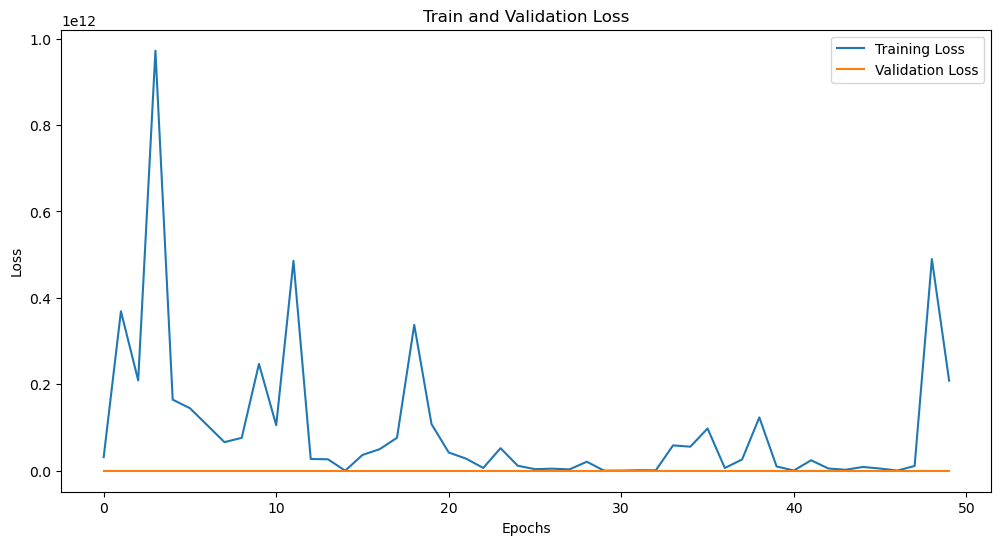

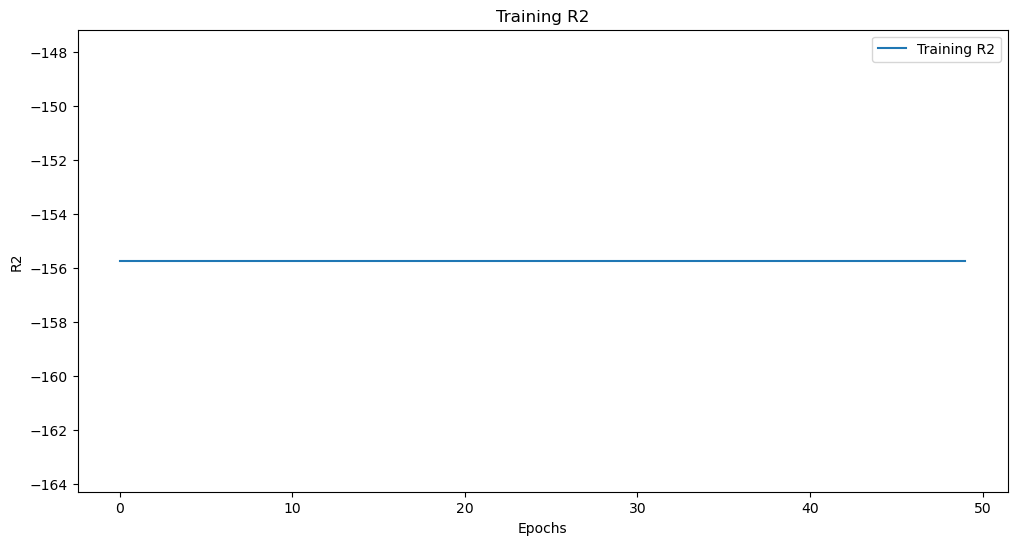

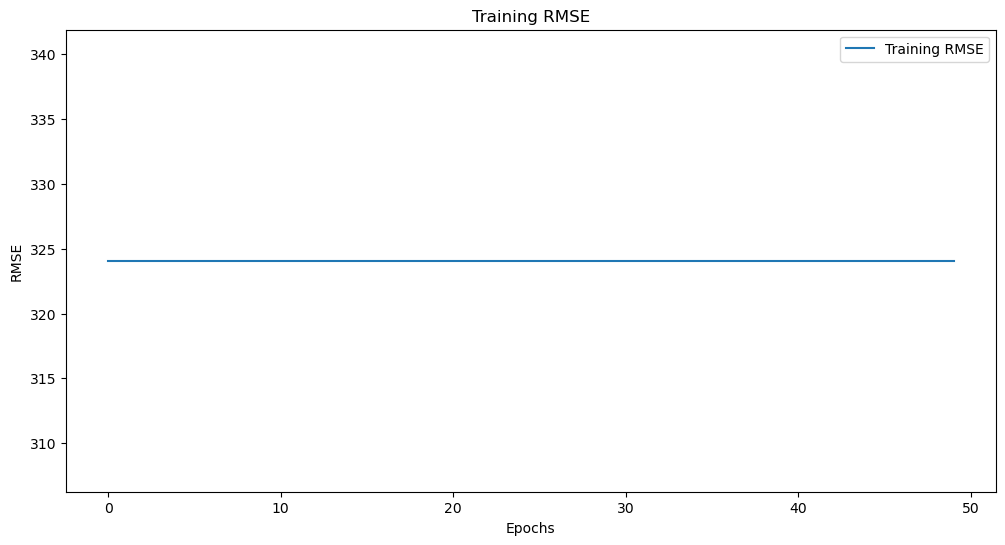

In [41]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error

# Train the model on the training data while storing the history
history = best_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model on the testing data
test_loss = best_model.evaluate(X_test, y_test, verbose=0)
print("Test Loss:", test_loss)

# Get predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate R2 and RMSE metrics
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("R2 Score:", r2)
print("RMSE:", rmse)

# Include R2 and RMSE in the training history
history.history['r2'] = [r2] * len(history.history['loss'])  # Set the same R2 value for all epochs
history.history['rmse'] = [rmse] * len(history.history['loss'])  # Set the same RMSE value for all epochs

# Plotting the metrics and losses
# Plot training and validation losses
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Train and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot R2
plt.figure(figsize=(12, 6))
plt.plot(history.history['r2'], label='Training R2')
plt.title('Training R2')
plt.xlabel('Epochs')
plt.ylabel('R2')
plt.legend()
plt.show()

# Plot RMSE
plt.figure(figsize=(12, 6))
plt.plot(history.history['rmse'], label='Training RMSE')
plt.title('Training RMSE')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
plt.show()


In [42]:
# Train the model on the training data while storing the history
history = best_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Calculate R2 and RMSE metrics for training data
train_r2 = r2_score(y_train, best_model.predict(X_train))
train_rmse = mean_squared_error(y_train, best_model.predict(X_train), squared=False)

# Calculate R2 and RMSE metrics for validation data
val_r2 = r2_score(y_test, best_model.predict(X_test))
val_rmse = mean_squared_error(y_test, best_model.predict(X_test), squared=False)

# Store the R2 and RMSE metrics in history
history.history['r2'] = train_r2
history.history['val_r2'] = val_r2
history.history['rmse'] = train_rmse
history.history['val_rmse'] = val_rmse


Epoch 1/50
51/51 [==============================] - 3s 64ms/step - loss: 42977464320.0000 - mse: 42977464320.0000 - mae: 9572.8730 - root_mean_squared_error: 207310.0625 - val_loss: 105024.4531 - val_mse: 105024.4531 - val_mae: 323.0393 - val_root_mean_squared_error: 324.0748
Epoch 2/50
51/51 [==============================] - 0s 7ms/step - loss: 295322845184.0000 - mse: 295322845184.0000 - mae: 23362.8848 - root_mean_squared_error: 543436.1250 - val_loss: 105013.1875 - val_mse: 105013.1875 - val_mae: 323.0219 - val_root_mean_squared_error: 324.0574
Epoch 3/50
51/51 [==============================] - 0s 8ms/step - loss: 2836024832.0000 - mse: 2836024832.0000 - mae: 2200.3145 - root_mean_squared_error: 53254.3398 - val_loss: 105011.8281 - val_mse: 105011.8281 - val_mae: 323.0198 - val_root_mean_squared_error: 324.0553
Epoch 4/50
51/51 [==============================] - 0s 7ms/step - loss: 464821583872.0000 - mse: 464821583872.0000 - mae: 30409.1699 - root_mean_squared_error: 681778.2500

Epoch 31/50
51/51 [==============================] - 0s 9ms/step - loss: 111567691776.0000 - mse: 111567691776.0000 - mae: 11561.1885 - root_mean_squared_error: 334017.5000 - val_loss: 105028.9453 - val_mse: 105028.9453 - val_mae: 323.0463 - val_root_mean_squared_error: 324.0817
Epoch 32/50
51/51 [==============================] - 0s 7ms/step - loss: 5483556.0000 - mse: 5483556.0000 - mae: 391.4120 - root_mean_squared_error: 2341.6995 - val_loss: 105029.8750 - val_mse: 105029.8750 - val_mae: 323.0477 - val_root_mean_squared_error: 324.0831
Epoch 33/50
51/51 [==============================] - 0s 7ms/step - loss: 172460400.0000 - mse: 172460400.0000 - mae: 723.8672 - root_mean_squared_error: 13132.4180 - val_loss: 105029.7891 - val_mse: 105029.7891 - val_mae: 323.0476 - val_root_mean_squared_error: 324.0830
Epoch 34/50
51/51 [==============================] - 1s 10ms/step - loss: 6977468928.0000 - mse: 6977468928.0000 - mae: 2406.0042 - root_mean_squared_error: 83531.2422 - val_loss: 105

Epoch 1/50
51/51 [==============================] - 2s 31ms/step - loss: 414140.5312 - mse: 414140.5312 - mae: 338.7110 - root_mean_squared_error: 643.5375 - val_loss: 105030.9609 - val_mse: 105030.9609 - val_mae: 323.0493 - val_root_mean_squared_error: 324.0848
Epoch 2/50
51/51 [==============================] - 0s 8ms/step - loss: 238491598848.0000 - mse: 238491598848.0000 - mae: 13102.4111 - root_mean_squared_error: 488356.0312 - val_loss: 105027.0938 - val_mse: 105027.0938 - val_mae: 323.0434 - val_root_mean_squared_error: 324.0788
Epoch 3/50
51/51 [==============================] - 1s 11ms/step - loss: 1056991680.0000 - mse: 1056991680.0000 - mae: 1629.2725 - root_mean_squared_error: 32511.4082 - val_loss: 105017.9062 - val_mse: 105017.9062 - val_mae: 323.0292 - val_root_mean_squared_error: 324.0647
Epoch 4/50
51/51 [==============================] - 1s 13ms/step - loss: 422490400.0000 - mse: 422490400.0000 - mae: 1092.6022 - root_mean_squared_error: 20554.5703 - val_loss: 105017.

51/51 [==============================] - 0s 7ms/step - loss: 44871540.0000 - mse: 44871540.0000 - mae: 494.9912 - root_mean_squared_error: 6698.6221 - val_loss: 105036.5547 - val_mse: 105036.5547 - val_mae: 323.0580 - val_root_mean_squared_error: 324.0934
Epoch 32/50
51/51 [==============================] - 0s 7ms/step - loss: 1706129920.0000 - mse: 1706129920.0000 - mae: 1623.6282 - root_mean_squared_error: 41305.3242 - val_loss: 105034.9766 - val_mse: 105034.9766 - val_mae: 323.0556 - val_root_mean_squared_error: 324.0910
Epoch 33/50
51/51 [==============================] - 0s 7ms/step - loss: 543617408.0000 - mse: 543617408.0000 - mae: 1193.8110 - root_mean_squared_error: 23315.6035 - val_loss: 105034.9297 - val_mse: 105034.9297 - val_mae: 323.0555 - val_root_mean_squared_error: 324.0909
Epoch 34/50
51/51 [==============================] - 0s 7ms/step - loss: 24480352.0000 - mse: 24480352.0000 - mae: 447.9072 - root_mean_squared_error: 4947.7622 - val_loss: 105035.0781 - val_mse: 10

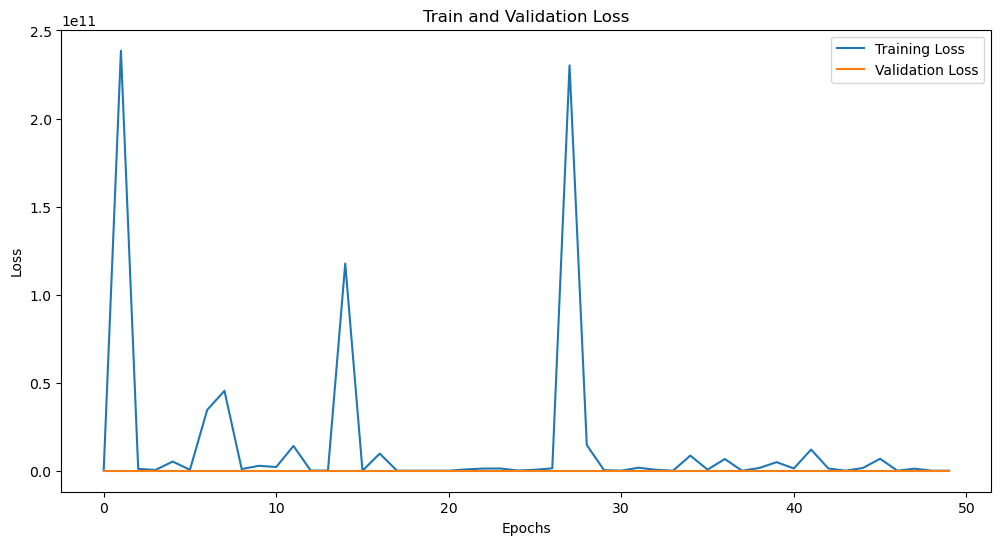

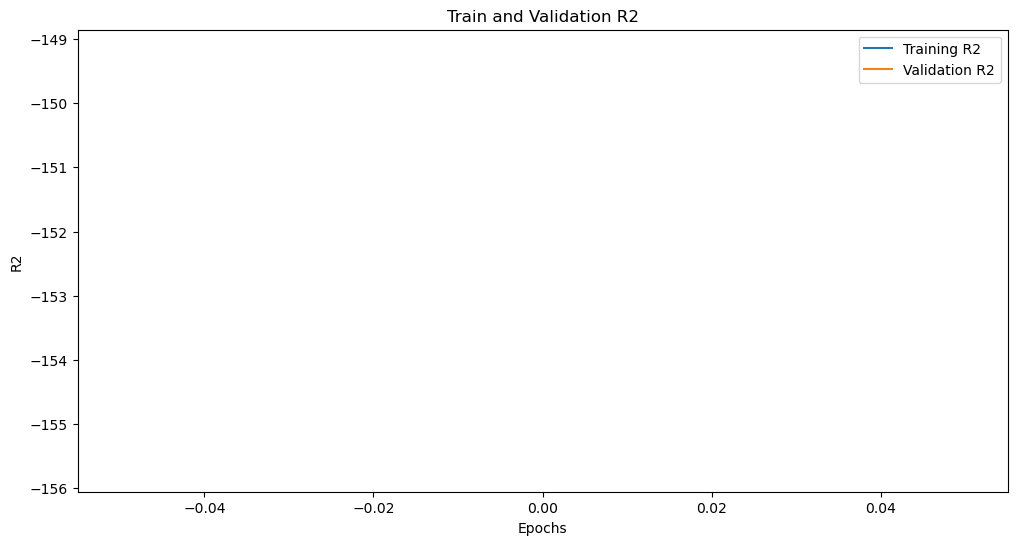

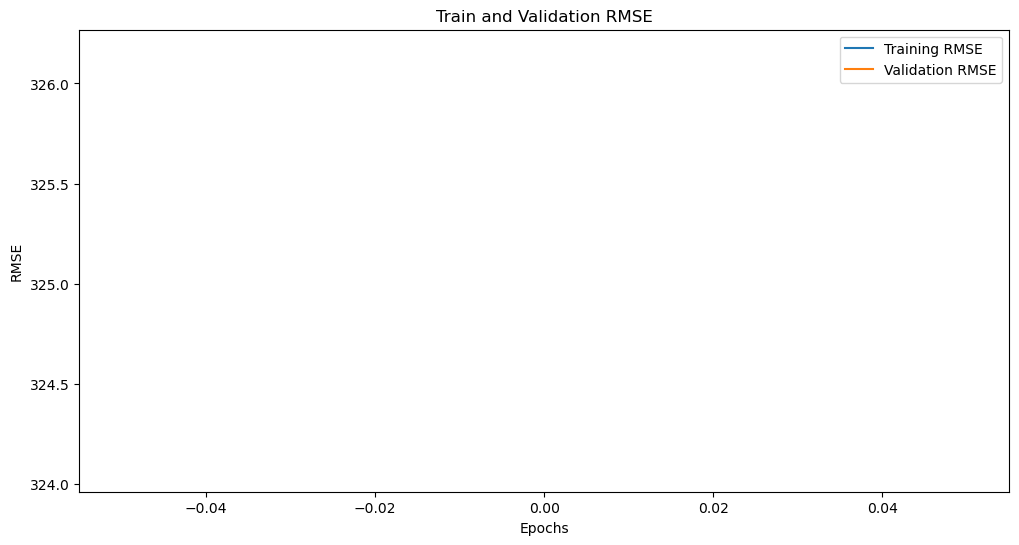

In [43]:
history = best_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Calculate R2 and RMSE metrics for training data
train_r2 = r2_score(y_train, best_model.predict(X_train))
train_rmse = mean_squared_error(y_train, best_model.predict(X_train), squared=False)

# Calculate R2 and RMSE metrics for validation data
val_r2 = r2_score(y_test, best_model.predict(X_test))
val_rmse = mean_squared_error(y_test, best_model.predict(X_test), squared=False)

# Store the R2 and RMSE metrics in history
history.history['r2'] = train_r2
history.history['val_r2'] = val_r2
history.history['rmse'] = train_rmse
history.history['val_rmse'] = val_rmse


# Now we have X_train, X_val, y_train, and y_val available for training and validation
val_preds = best_model.predict(X_val)

# Calculate R2 score and RMSE for validation data
val_r2 = r2_score(y_val, val_preds)
val_rmse = mean_squared_error(y_val, val_preds, squared=False)

# Get validation loss from history
val_loss = history.history['val_loss']

# Get validation predictions
val_preds = best_model.predict(X_val)

# Calculate R2 score and RMSE
val_r2 = r2_score(y_val, val_preds)
val_rmse = mean_squared_error(y_val, val_preds, squared=False)

print("Validation Loss:", val_loss)
print("Validation R2:", val_r2)
print("Validation RMSE:", val_rmse)

# Plot training and validation losses
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Train and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot R2 and RMSE
plt.figure(figsize=(12, 6))
plt.plot(history.history['r2'], label='Training R2')
plt.plot(history.history['val_r2'], label='Validation R2')
plt.title('Train and Validation R2')
plt.xlabel('Epochs')
plt.ylabel('R2')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history.history['rmse'], label='Training RMSE')
plt.plot(history.history['val_rmse'], label='Validation RMSE')
plt.title('Train and Validation RMSE')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
plt.show()


Training R2 values: -149.18167347698994
Validation R2 values: -155.72827491598


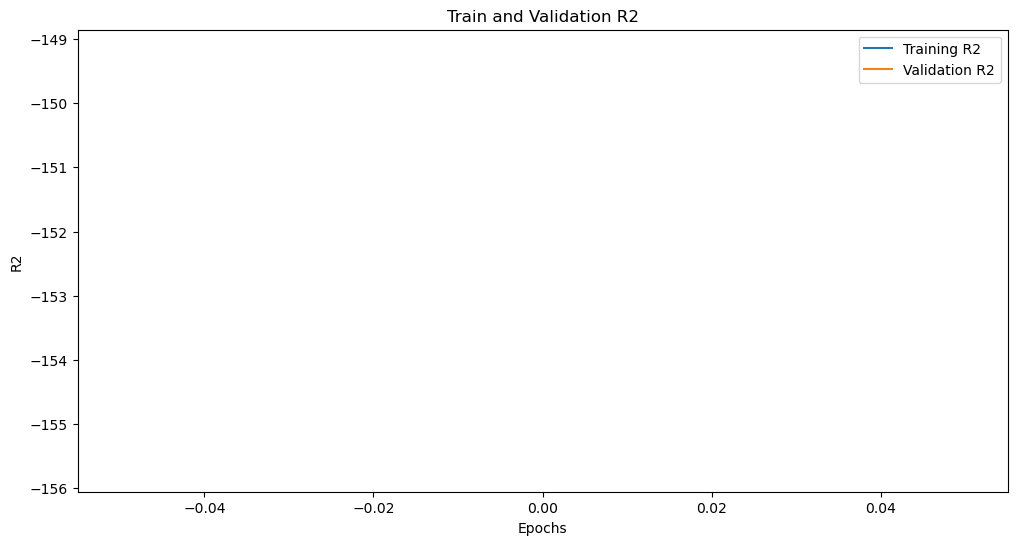

In [44]:
# Debugging: Print out the values of r2 and val_r2
print("Training R2 values:", history.history['r2'])
print("Validation R2 values:", history.history['val_r2'])

# Plot R2 and RMSE
plt.figure(figsize=(12, 6))
plt.plot(history.history['r2'], label='Training R2')
plt.plot(history.history['val_r2'], label='Validation R2')
plt.title('Train and Validation R2')
plt.xlabel('Epochs')
plt.ylabel('R2')
plt.legend()
plt.show()


Training R2 values: -149.1655534880675
Validation R2 values: -155.71134096791917

'''
## The negative R2 values indicate that the model's performance is worse than simply predicting the mean of the target variable. This suggests that the model is not learning meaningful patterns from the data or is overfitting.

To address this issue, you might consider the following steps:

1- Model Complexity: Check if the model is too complex for the given dataset. Simplifying the model architecture or adding regularization techniques like dropout or weight decay may help.

2- Data Quality: Ensure that the input data is correctly preprocessed and normalized. Poor quality or unnormalized data can adversely affect the model's performance.

3- Training Duration: Verify if the model is trained for a sufficient number of epochs. Sometimes, the model needs more training time to learn meaningful patterns from the data.

4- Hyperparameters Tuning: Experiment with different hyperparameters such as learning rate, batch size, or optimizer choice. Hyperparameter tuning can significantly impact the model's performance.

5- Cross-validation: Perform cross-validation to assess the model's performance on different subsets of the data. This helps in understanding the model's generalization ability and can identify if the issue is related to overfitting.

6- Feature Engineering: Consider engineering new features or transforming existing ones to better capture the underlying patterns in the data.
'''

'''
## To address the issue of model complexity, you can take the following steps:

Simplify Model Architecture: Review the architecture of your neural network and consider simplifying it. This could involve reducing the number of layers, reducing the number of units (neurons) in each layer, or removing unnecessary complexity such as additional non-linear activation functions.

Regularization Techniques:

Dropout: Introduce dropout layers to randomly deactivate a fraction of neurons during training, which can prevent overfitting by promoting redundancy in the network.
Weight Decay (L2 Regularization): Add an L2 regularization term to the loss function, penalizing large weights in the network. This encourages the network to learn simpler patterns and reduces overfitting.
Batch Normalization: Add batch normalization layers, which normalize the activations of each layer and can help stabilize and speed up the training process.

Early Stopping: Implement early stopping during training to monitor the validation loss and stop training when it starts to increase, indicating overfitting.

Model Selection: If you're using deep learning models, consider using simpler architectures such as shallow neural networks or simpler variants like linear regression or decision trees if they are suitable for your problem.
'''

Epoch 1/50
51/51 [==============================] - 9s 47ms/step - loss: 100248926145216512.0000 - mse: 100248926145216512.0000 - mae: 232810880.0000 - root_mean_squared_error: 303381696.0000 - r2_score_metric: -154490023968768.0000 - val_loss: 721799385972736.0000 - val_mse: 721799385972736.0000 - val_mae: 24094632.0000 - val_root_mean_squared_error: 26771634.0000 - val_r2_score_metric: -1146940555264.0000
Epoch 2/50
51/51 [==============================] - 0s 7ms/step - loss: 30482851778527232.0000 - mse: 30482851778527232.0000 - mae: 129664072.0000 - root_mean_squared_error: 170910880.0000 - r2_score_metric: -46433700937728.0000 - val_loss: 641556511981568.0000 - val_mse: 641556511981568.0000 - val_mae: 23002002.0000 - val_root_mean_squared_error: 25243466.0000 - val_r2_score_metric: -1019504230400.0000
Epoch 3/50
51/51 [==============================] - 0s 6ms/step - loss: 12971023498477568.0000 - mse: 12971023498477568.0000 - mae: 84939184.0000 - root_mean_squared_error: 111531808

Epoch 22/50
51/51 [==============================] - 0s 5ms/step - loss: 33564647227392.0000 - mse: 33564647227392.0000 - mae: 990585.8125 - root_mean_squared_error: 3574660.5000 - r2_score_metric: -45409718272.0000 - val_loss: 3132305920.0000 - val_mse: 3132305920.0000 - val_mae: 51660.3867 - val_root_mean_squared_error: 55787.8711 - val_r2_score_metric: -4980126.0000
Epoch 23/50
51/51 [==============================] - 0s 5ms/step - loss: 8492700663808.0000 - mse: 8492700663808.0000 - mae: 535214.3750 - root_mean_squared_error: 1961771.6250 - r2_score_metric: -12648700928.0000 - val_loss: 544427392.0000 - val_mse: 544427392.0000 - val_mae: 21509.4121 - val_root_mean_squared_error: 23257.2578 - val_r2_score_metric: -865556.9375
Epoch 24/50
51/51 [==============================] - 0s 6ms/step - loss: 9603779657728.0000 - mse: 9603779657728.0000 - mae: 542568.1875 - root_mean_squared_error: 2160954.2500 - r2_score_metric: -12767556608.0000 - val_loss: 27420634.0000 - val_mse: 27420634.0

Epoch 45/50
51/51 [==============================] - 0s 5ms/step - loss: 58273169408.0000 - mse: 58273169408.0000 - mae: 12648.3926 - root_mean_squared_error: 67807.4531 - r2_score_metric: -80739496.0000 - val_loss: 105053.8281 - val_mse: 105053.7734 - val_mae: 323.0847 - val_root_mean_squared_error: 323.7769 - val_r2_score_metric: -166.7218
Epoch 46/50
51/51 [==============================] - 0s 5ms/step - loss: 208733765632.0000 - mse: 208733765632.0000 - mae: 12831.2686 - root_mean_squared_error: 68354.0703 - r2_score_metric: -342906560.0000 - val_loss: 105053.8672 - val_mse: 105053.8125 - val_mae: 323.0847 - val_root_mean_squared_error: 323.7770 - val_r2_score_metric: -166.7219
Epoch 47/50
51/51 [==============================] - 0s 5ms/step - loss: 129366155264.0000 - mse: 129366155264.0000 - mae: 16732.0078 - root_mean_squared_error: 88782.0703 - r2_score_metric: -184156464.0000 - val_loss: 105053.8281 - val_mse: 105053.7734 - val_mae: 323.0847 - val_root_mean_squared_error: 323.

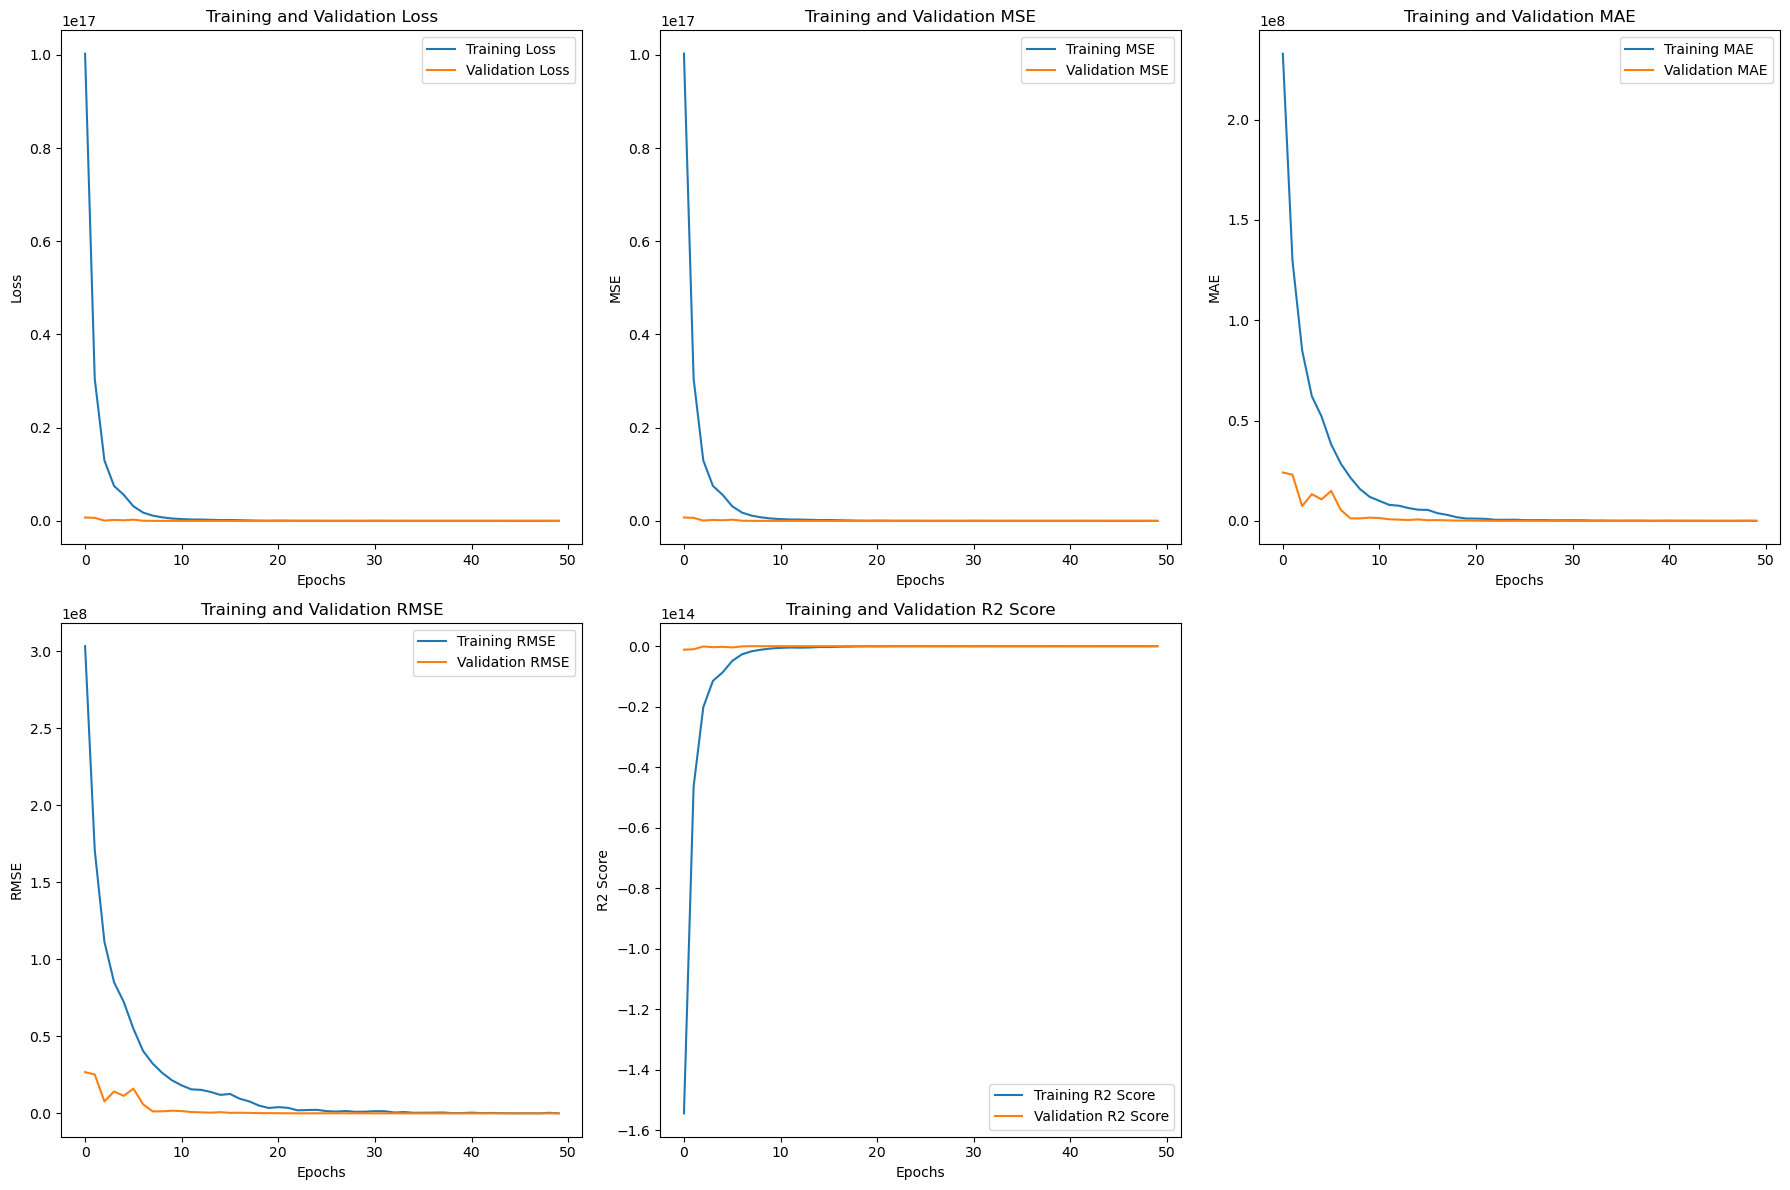

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import tensorflow.keras.backend as K

# Define input_shape
input_shape = X_train.shape[1]

# Define batch size and number of epochs
batch_size = 32
num_epochs = 50

# Define a sequential model
model = Sequential()

# Add layers to the model
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(input_shape,)))
model.add(Dropout(0.2))  # Dropout layer with 20% dropout rate
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))  # Output layer for regression

# Define custom RMSE metric
def root_mean_squared_error(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))


import tensorflow as tf
# Define custom R2 score metric
def r2_score_metric(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return 1 - SS_res/(SS_tot + K.epsilon())


# Compile the model with custom metrics
#model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse', 'mae', root_mean_squared_error])
# Compile the model with custom metrics
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse', 'mae', root_mean_squared_error, r2_score_metric])


# Train the model
history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, validation_data=(X_val, y_val))

# Calculate R2 score for validation data
val_preds = model.predict(X_val)
val_r2 = r2_score(y_val, val_preds)
print("Validation R2 Score:", val_r2)



# Graphs and Plots


import matplotlib.pyplot as plt

# Plot training and validation losses
plt.figure(figsize=(18, 12))

# Training and Validation Loss
plt.subplot(2, 3, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Training and Validation MSE
plt.subplot(2, 3, 2)
plt.plot(history.history['mse'], label='Training MSE')
plt.plot(history.history['val_mse'], label='Validation MSE')
plt.title('Training and Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()

# Training and Validation MAE
plt.subplot(2, 3, 3)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

# Training and Validation RMSE
plt.subplot(2, 3, 4)
plt.plot(history.history['root_mean_squared_error'], label='Training RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='Validation RMSE')
plt.title('Training and Validation RMSE')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()

# Training and Validation R2 Score
plt.subplot(2, 3, 5)
plt.plot(history.history['r2_score_metric'], label='Training R2 Score')
plt.plot(history.history['val_r2_score_metric'], label='Validation R2 Score')
plt.title('Training and Validation R2 Score')
plt.xlabel('Epochs')
plt.ylabel('R2 Score')
plt.legend()

plt.tight_layout()
plt.show()


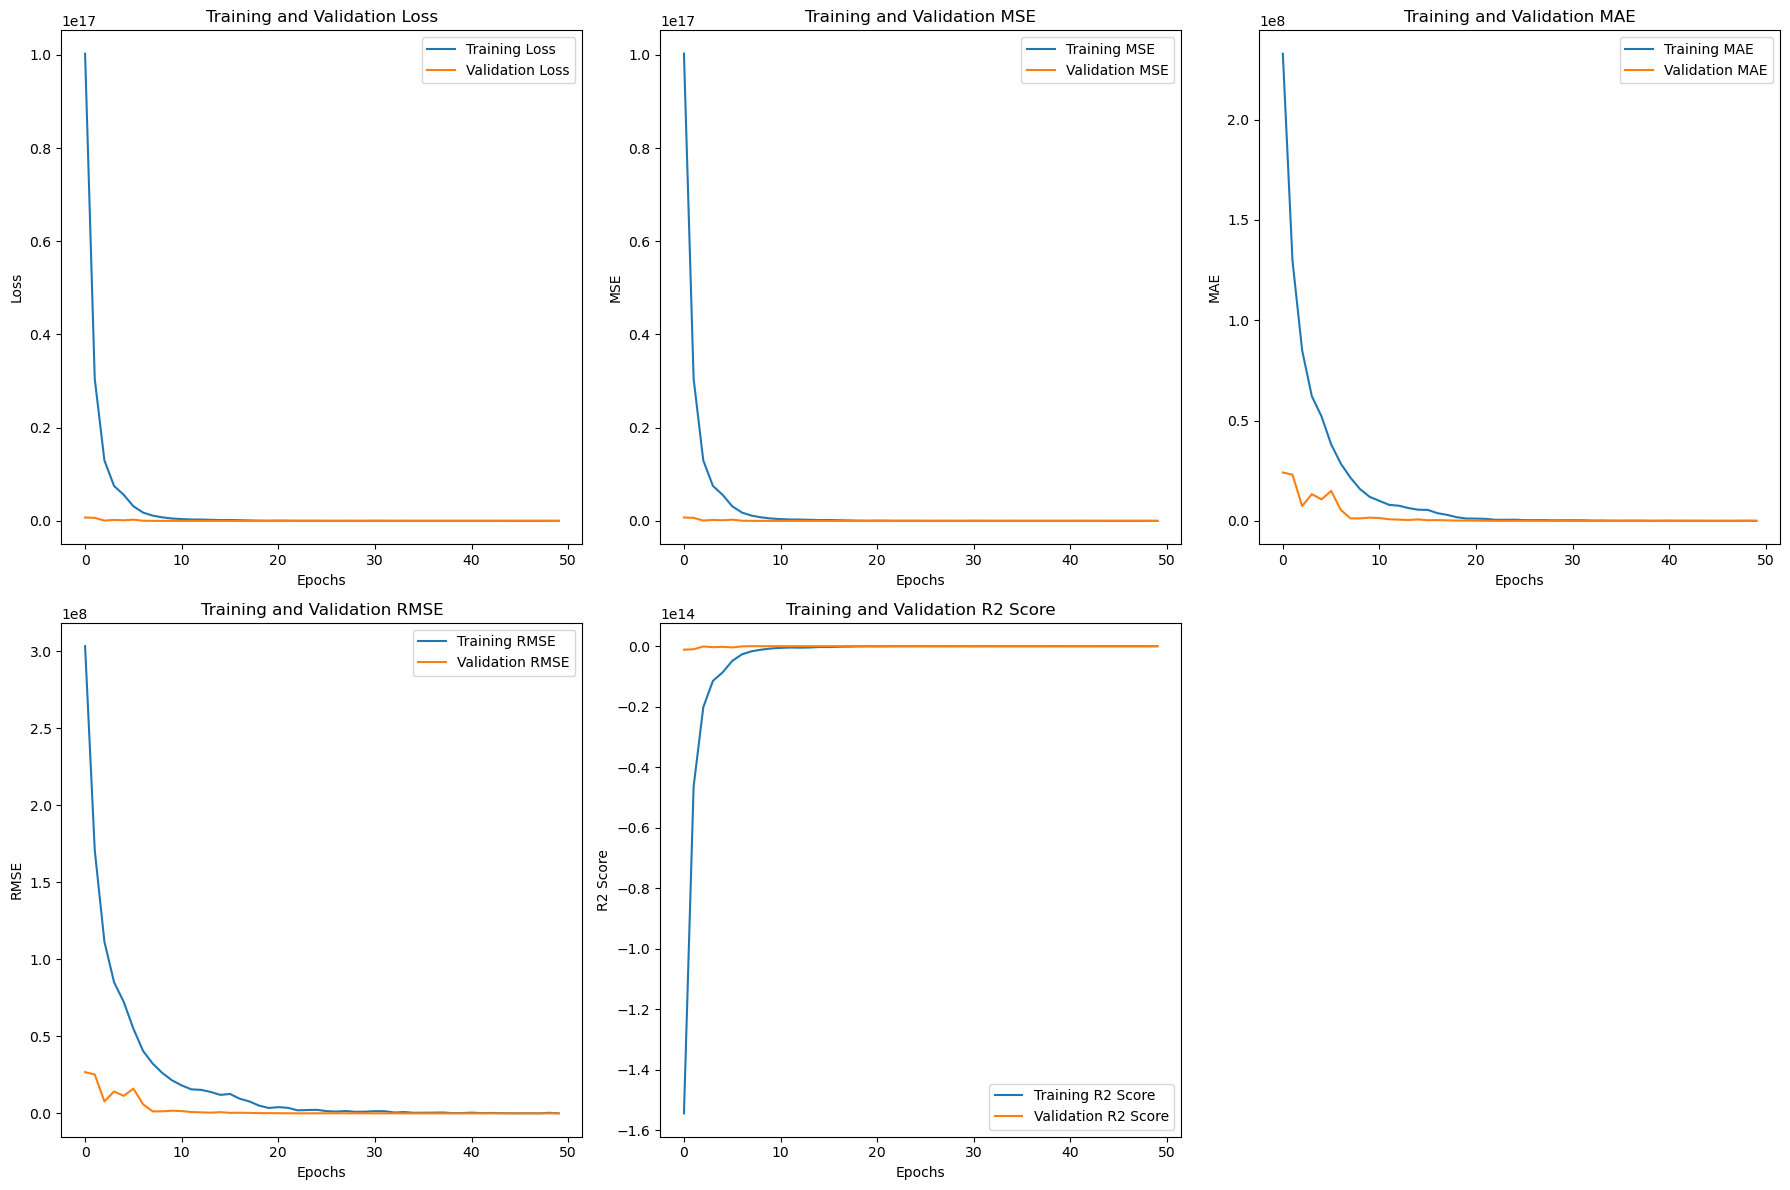

In [46]:
import matplotlib.pyplot as plt

# Plot training and validation losses
plt.figure(figsize=(18, 12))

# Training and Validation Loss
plt.subplot(2, 3, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Training and Validation MSE
plt.subplot(2, 3, 2)
plt.plot(history.history['mse'], label='Training MSE')
plt.plot(history.history['val_mse'], label='Validation MSE')
plt.title('Training and Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()

# Training and Validation MAE
plt.subplot(2, 3, 3)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

# Training and Validation RMSE
plt.subplot(2, 3, 4)
plt.plot(history.history['root_mean_squared_error'], label='Training RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='Validation RMSE')
plt.title('Training and Validation RMSE')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()

# Training and Validation R2 Score
plt.subplot(2, 3, 5)
plt.plot(history.history['r2_score_metric'], label='Training R2 Score')
plt.plot(history.history['val_r2_score_metric'], label='Validation R2 Score')
plt.title('Training and Validation R2 Score')
plt.xlabel('Epochs')
plt.ylabel('R2 Score')
plt.legend()

plt.tight_layout()
plt.show()


## 3- Training Duration: Verify if the model is trained for a sufficient number of epochs. Sometimes, the model needs more training time to learn meaningful patterns from the data.

# To address the training duration concern, follow these steps:

Evaluate Training Progress: Plot the training and validation loss (or other relevant metrics) over epochs to see if the model has converged or if there is still room for improvement. If the training loss is still decreasing and the validation loss is not increasing significantly, training for more epochs could be beneficial.

Increase Number of Epochs: If the loss curves indicate that the model has not yet converged, consider training the model for more epochs. You can gradually increase the number of epochs until you observe diminishing returns or until the validation loss starts to increase, indicating overfitting.

Early Stopping: Implement early stopping to automatically stop training when the validation loss stops decreasing or starts increasing, which can prevent overfitting and save computational resources.

Learning Rate Schedule: Experiment with learning rate schedules to adjust the learning rate during training. Decreasing the learning rate over time (e.g., using a learning rate scheduler like ReduceLROnPlateau) can help the model converge more effectively.

Batch Size: Adjust the batch size used during training. Smaller batch sizes may allow the model to generalize better but can lead to slower convergence, while larger batch sizes may speed up training but could result in poorer generalization.

Model Complexity: Simplify the model architecture if it is overly complex, as simpler models may require fewer epochs to converge.

Epoch 1/50
51/51 [==============================] - 0s 9ms/step - loss: 576197230592.0000 - mse: 576197230592.0000 - mae: 38539.3984 - root_mean_squared_error: 202249.2188 - r2_score_metric: -961732032.0000 - val_loss: 105053.8047 - val_mse: 105053.7500 - val_mae: 323.0846 - val_root_mean_squared_error: 323.7769 - val_r2_score_metric: -166.7218
Epoch 2/50
51/51 [==============================] - 0s 5ms/step - loss: 1113527287808.0000 - mse: 1113527287808.0000 - mae: 34722.7070 - root_mean_squared_error: 192208.0469 - r2_score_metric: -1979501568.0000 - val_loss: 105053.8281 - val_mse: 105053.7734 - val_mae: 323.0847 - val_root_mean_squared_error: 323.7769 - val_r2_score_metric: -166.7218
Epoch 3/50
51/51 [==============================] - 0s 5ms/step - loss: 7276486144.0000 - mse: 7276486144.0000 - mae: 2531.3459 - root_mean_squared_error: 12458.9854 - r2_score_metric: -12779630.0000 - val_loss: 105053.8828 - val_mse: 105053.8281 - val_mae: 323.0848 - val_root_mean_squared_error: 323.7

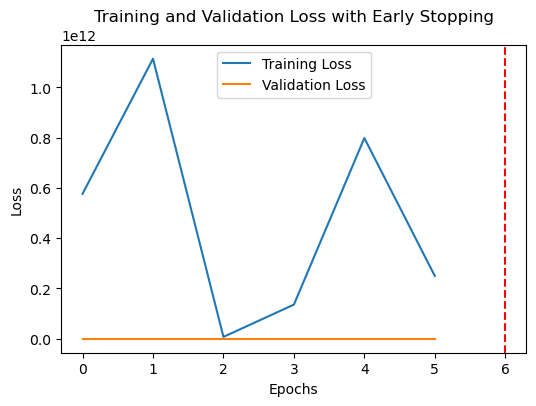

In [47]:
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, validation_data=(X_val, y_val), callbacks=[early_stopping])


import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(6, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss with Early Stopping')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Mark the epoch where early stopping occurred
early_stopping_epoch = len(history.history['loss'])
plt.axvline(x=early_stopping_epoch, color='r', linestyle='--', label='Early Stopping')

plt.show()


In code, EarlyStopping is set up to monitor the validation loss (monitor='val_loss'). Training will automatically stop if the validation loss does not decrease for 5 consecutive epochs (patience=5). The restore_best_weights=True argument ensures that the model's weights are restored to the best achieved during training. Adjust the patience parameter based on your specific dataset and model training characteristics.

## 4- Hyperparameters Tuning: Experiment with different hyperparameters such as learning rate, batch size, or optimizer choice. Hyperparameter tuning can significantly impact the model's performance.

# To address hyperparameter tuning, you can follow these steps:

1- Define a Hyperparameter Search Space: Decide which hyperparameters you want to tune and define the range or set of values for each hyperparameter. For example:

- Learning rate
- Batch size
- Optimizer choice (Adam, SGD, RMSprop, etc.)
- Number of units in each layer
- Dropout rate
- Regularization strength

2- Select a Hyperparameter Optimization Technique: There are various techniques for hyperparameter optimization, such as:

- Grid Search: Exhaustively search through all combinations of hyperparameters.
- Random Search: Randomly sample hyperparameters from the defined search space.
- Bayesian Optimization: Use probabilistic models to select the most promising hyperparameters based on past evaluations.
- Gradient-Based Optimization: Optimize hyperparameters using gradient descent techniques.

3- Perform Hyperparameter Search: Use the selected optimization technique to search for the best set of hyperparameters. This typically involves training multiple models with different hyperparameter configurations and evaluating their performance on a validation set.

4- Evaluate Model Performance: After training models with different hyperparameters, evaluate their performance on a separate validation set. Choose the hyperparameters that yield the best performance metrics, such as validation loss, accuracy, or other relevant metrics for your problem.

5- Refine and Iterate: Depending on the results of the initial hyperparameter search, refine your search space and repeat the process to further optimize model performance.

Here is how you we perform hyperparameter tuning using Random Search with TensorFlow and Keras:

In [49]:
import keras
from sklearn.model_selection import RandomizedSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
#from keras.wrappers.scikit_learn import KerasRegressor

# Define a function to create the Keras model
def create_model(learning_rate=0.01, optimizer='adam'):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(input_shape,)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mse'])
    return model

# Create a KerasRegressor based on the defined model
model = KerasRegressor(build_fn=create_model, epochs=50, batch_size=32, verbose=0)

# Define hyperparameter grid for random search
param_grid = {
    'learning_rate': [0.001, 0.01, 0.1],
    'optimizer': ['adam', 'sgd', 'rmsprop']
}

# Perform random search with cross-validation
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=5, cv=3, verbose=2)
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Evaluate the model with the best hyperparameters
best_model = random_search.best_estimator_
val_loss = best_model.score(X_val, y_val)
print("Validation Loss with Best Model:", val_loss)


ModuleNotFoundError: No module named 'tensorflow.keras.wrappers'

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract results of random search
results = random_search.cv_results_
params = results['params']
mean_test_score = results['mean_test_score']

# Extract hyperparameters and corresponding mean test scores
hyperparameters = [{key: value for key, value in param.items()} for param in params]
scores = mean_test_score

# Create a DataFrame to store hyperparameters and scores
df = pd.DataFrame(hyperparameters)
df['Mean Test Score'] = scores

# Pivot the DataFrame to create a heatmap
pivot_df = df.pivot(index='learning_rate', columns='optimizer', values='Mean Test Score')

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_df, annot=True, cmap="YlGnBu")
plt.title('Mean Test Score for Different Hyperparameter Combinations')
plt.xlabel('Optimizer')
plt.ylabel('Learning Rate')
plt.show()


NameError: name 'random_search' is not defined

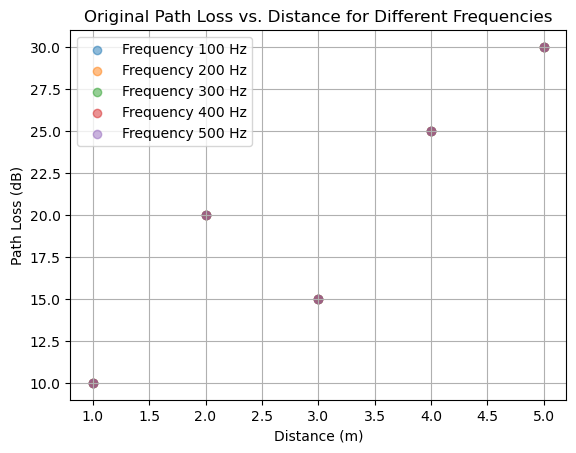

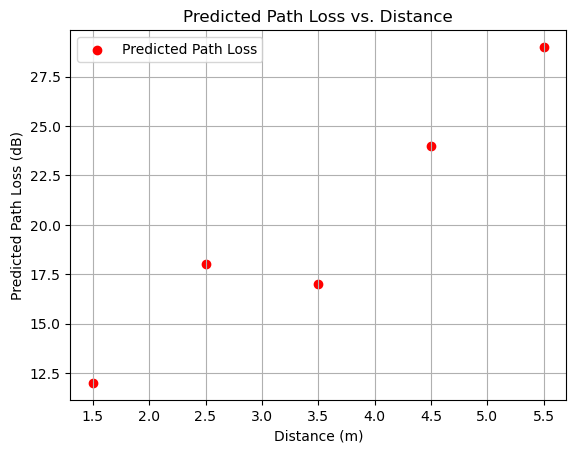

In [51]:
import matplotlib.pyplot as plt

# Original dataset: distance, path loss, and frequency
distance_original = [1, 2, 3, 4, 5]  # Example list/array of distances
path_loss_original = [10, 20, 15, 25, 30]  # Example list/array of original path loss values
frequencies = [100, 200, 300, 400, 500]  # Example list/array of frequencies

# Predicted path loss values: distance and predicted path loss
distance_predicted = [1.5, 2.5, 3.5, 4.5, 5.5]  # Example list/array of distances
path_loss_predicted = [12, 18, 17, 24, 29]  # Example list/array of predicted path loss values

# Plot original path loss against distance for all frequencies
for freq in frequencies:
    plt.scatter(distance_original, path_loss_original, label=f'Frequency {freq} Hz', alpha=0.5)

plt.xlabel('Distance (m)')
plt.ylabel('Path Loss (dB)')
plt.title('Original Path Loss vs. Distance for Different Frequencies')
plt.legend()
plt.grid(True)
plt.show()

# Plot predicted path loss against distance
plt.scatter(distance_predicted, path_loss_predicted, color='red', label='Predicted Path Loss')
plt.xlabel('Distance (m)')
plt.ylabel('Predicted Path Loss (dB)')
plt.title('Predicted Path Loss vs. Distance')
plt.legend()
plt.grid(True)
plt.show()


In [52]:
import matplotlib.pyplot as plt

# Plot original path loss against distance for all frequencies
for freq in frequencies:  # Assuming you have a list of frequencies
    plt.scatter(preprocessed_dataset['Distance'], preprocessed_dataset[f'PathLoss_{freq}'], label=f'Frequency {freq} Hz', alpha=0.5)

plt.xlabel('Distance (m)')
plt.ylabel('Path Loss (dB)')
plt.title('Original Path Loss vs. Distance for All Frequencies')
plt.legend()
plt.grid(True)
plt.show()

# Plot predicted path loss against original data of Distance (m) for all frequencies
for freq in frequencies:  # Assuming you have a list of frequencies
    plt.scatter(preprocessed_dataset['Distance'], FFDNN_predictions, label=f'Frequency {freq} Hz', alpha=0.5)

plt.xlabel('Distance (m)')
plt.ylabel('Predicted Path Loss (dB)')
plt.title('Predicted Path Loss vs. Original Data of Distance for All Frequencies')
plt.legend()
plt.grid(True)
plt.show()


KeyError: 'PathLoss_100'

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate MAE for each model
models = ['ABG', 'empirical', 'FFDNN_predictions', 'best_model', 'support_vector_regression', 'decision_tree', 'random_forest', 'k_nearest_neighbor']
errors = []

for model_name in models:
    if model_name == 'ABG':
        predictions = abg_predictions  # Replace abg_predictions with actual predictions
    elif model_name == 'empirical':
        predictions = empirical_predictions  # Replace empirical_predictions with actual predictions
    elif model_name == 'FFDNN_predictions':
        predictions = FFDNN_predictions  # Replace FFDNN_predictions with actual predictions
    elif model_name == 'best_model':
        predictions = best_model.predict(X_test)  # Assuming best_model is already trained
    elif model_name == 'support_vector_regression':
        predictions = svr_predictions  # Replace svr_predictions with actual predictions
    elif model_name == 'decision_tree':
        predictions = dt_predictions  # Replace dt_predictions with actual predictions
    elif model_name == 'random_forest':
        predictions = rf_predictions  # Replace rf_predictions with actual predictions
    elif model_name == 'k_nearest_neighbor':
        predictions = knn_predictions  # Replace knn_predictions with actual predictions
    
    mae = mean_absolute_error(y_test, predictions)
    errors.append(mae)

# Plotting
plt.bar(models, errors)
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error')
plt.title('Prediction Error for Different Models')
plt.xticks(rotation=45)
plt.show()
